In [1]:
#Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import matplotlib.ticker as ticker

In [2]:
# API Key from EIA
api_key = '4Cgy5BurMNMAhbo0RBIu3s5FFyyo37QEVmW0uBoz'
# PADD Names to Label Columns
# Change to whatever column labels you want to use.
SERIES_NAMES = ['Residential']
# Enter all your Series IDs here separated by commas
SERIES_KEY = ['ELEC.PRICE.CA-RES.Q']
# Initialize list - this is the final list that you will store all the data from the json pull. Then you will use this list to concat into a pandas dataframe. 
final_data = []
# Choose start and end dates
startDate = '2018-01-01'
endDate = '2022-02-01'


# Pull in data via EIA API
for i in range(len(SERIES_KEY)):
    url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + SERIES_KEY[i]
    r = requests.get(url)
    json_data = r.json()
    
    if r.status_code == 200:
        print('Success!')
    else:
        print('Error')
    
    df = pd.DataFrame(json_data.get('series')[0].get('data'),
                      columns = ['Date', SERIES_NAMES[i]])
    df.set_index('Date', drop=True, inplace=True)
    final_data.append(df)

print(final_data[0])

Success!
        Residential
Date               
2021Q3        23.06
2021Q2        23.06
2021Q1        22.20
2020Q4        20.99
2020Q3        20.62
...             ...
2002Q1        12.75
2001Q4        12.30
2001Q3        12.90
2001Q2        12.04
2001Q1        11.10

[83 rows x 1 columns]


In [3]:
final_data[0]['Year']=final_data[0].index.astype(str).str[:4]
final_data[0]['Month']=final_data[0].index.astype(str).str[5:6]


for i in range(len(final_data[0])):
    final_data[0]['Month'][i]=str((int(final_data[0]['Month'][i])-1)*3+1)

final_data[0]['Day']='1'
final_data[0]['Date'] = pd.to_datetime(final_data[0][['Year','Month','Day']])
final_data[0].set_index('Date',drop=True,inplace=True)
final_data[0].sort_index(inplace=True)
final_data[0] = final_data[0][startDate:endDate]
final_data[0] = final_data[0].iloc[:,:5]



/var/folders/cn/9b7qzyxn6512frdxy000fj8h0000gn/T/ipykernel_3621/2006392677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[0]['Month'][i]=str((int(final_data[0]['Month'][i])-1)*3+1)


In [4]:
print(final_data[0])

            Residential  Year Month Day
Date                                   
2018-01-01        18.86  2018     1   1
2018-04-01        18.37  2018     4   1
2018-07-01        19.63  2018     7   1
2018-10-01        18.11  2018    10   1
2019-01-01        19.05  2019     1   1
2019-04-01        19.27  2019     4   1
2019-07-01        20.08  2019     7   1
2019-10-01        17.93  2019    10   1
2020-01-01        20.54  2020     1   1
2020-04-01        19.51  2020     4   1
2020-07-01        20.62  2020     7   1
2020-10-01        20.99  2020    10   1
2021-01-01        22.20  2021     1   1
2021-04-01        23.06  2021     4   1
2021-07-01        23.06  2021     7   1


In [5]:
final_data.append(final_data[0].copy())

final_data[1].rename(columns={"Residential":"yoy"},inplace=True)

In [6]:


for i in range(-1,-len(final_data[1])+4,-1):
    final_data[1]['yoy'][i]=final_data[0]['Residential'][i]/final_data[0]['Residential'][i-4]




/var/folders/cn/9b7qzyxn6512frdxy000fj8h0000gn/T/ipykernel_3621/1023459260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[1]['yoy'][i]=final_data[0]['Residential'][i]/final_data[0]['Residential'][i-4]


In [7]:

final_data[1].drop(final_data[1].index[np.arange(0,5)],inplace=True)



In [8]:
final_data[0]=final_data[1].copy()

del final_data[1]




In [9]:
print(final_data[0])

                 yoy  Year Month Day
Date                                
2019-04-01  1.048993  2019     4   1
2019-07-01  1.022924  2019     7   1
2019-10-01  0.990061  2019    10   1
2020-01-01  1.078215  2020     1   1
2020-04-01  1.012455  2020     4   1
2020-07-01  1.026892  2020     7   1
2020-10-01  1.170664  2020    10   1
2021-01-01  1.080818  2021     1   1
2021-04-01  1.181958  2021     4   1
2021-07-01  1.118332  2021     7   1


In [10]:


crude = pd.concat(final_data,axis=1)

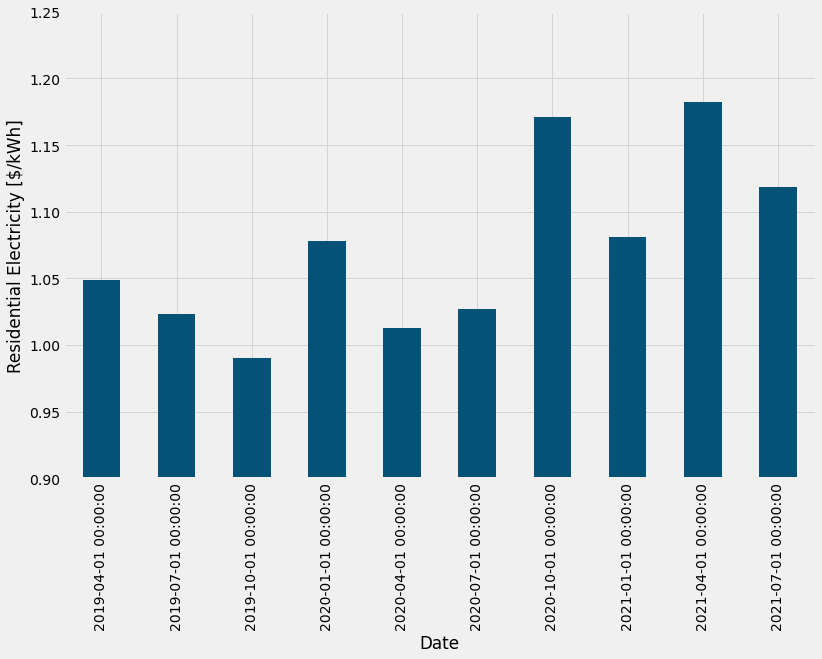

In [16]:


# Generating Colours and Style
colors = {'Brent':'#045275','TREND 1':'#DC3977','TREND 2':'#DC3977'}
plt.style.use('fivethirtyeight')


# Creating the Visualization
plot = crude.plot.bar(figsize=(12,8),
                color=list(colors.values()), 
                linewidth=2, 
                legend=False)


plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plot.grid(color='#d4d4d4')
plot.set_ylabel('Residential Electricity [$/kWh]')
#plot.set_yticks(range(0,120,10))
plot.set_ylim([0.9,1.25])
#plot.tick_params(labelright=True)

## Get x ticks with evenly spaced dates
datestart=final_data[0].index[0]
dateend=final_data[0].index[-1]
xdates=[datestart]
while xdates[-1]<dateend:
    xdates.append(xdates[-1] + relativedelta(months=3))

xlabels=[]
for i in xdates:
    xlabels.append(i.strftime('%Y-%b'))


#plot.set_xticks(xdates)
#plot.set_xticklabels(xlabels)
""" 
a=plot.get_xaxis()
a.set_major_formatter(ticker.NullFormatter())
a.set_minor_locator(ticker.FixedLocator(xdates))
 """
##

#plot.set_xlim([date(2019,1,1),date(2022,1,1)])
#plot.set_xlabel('')
#plot.legend({'OECD + non-OECD'},fontsize=22,loc='bottom right')
""" plot.text(x = date(2018,6,1), 
          y = 110, 
          s = "Brent Crude", 
          fontsize = 23, 
          weight = 'bold', 
          alpha = .75)
plot.text(x = date(2015,11,1), 
          y = 3,
          s = '@peterdevietien   Data: EIA', 
          fontsize = 14) """


pngname='residential-electricity-CA'
plt.savefig('/Users/peter/projects/oil/post/'+pngname)



In [12]:
#[for date(2020,1,1),date(2020,1,1) +relativedelta(months=3)]

k=range(0,120,20)
print(k[-1])

100
